In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import  matplotlib.pyplot as plt
import pickle

In [3]:
# RAW DF ingestion
columns = ['transaction_id', 'ship_id', 'ship_class', 'ship_durability', 'ship_owner', \
        'ship_attr_space', 'ship_attr_speed', 'ship_attr_skill', 'ship_attr_defence', 'ship_attr_attack', 'ship_attr_morale', \
        'ship_parts_keel', 'ship_parts_sail', 'ship_parts_side', 'ship_parts_bow', 'ship_parts_cabin', 'ship_parts_stern', \
        'ship_sold_price']
raw_df = pd.read_csv("db/extracted_sold.csv", names=columns)

##

raw_df = raw_df.drop_duplicates(subset=['transaction_id', 'ship_id'], keep='last').reset_index()

In [4]:
raw_df.head()

,index,transaction_id,ship_id,ship_class,ship_durability,ship_owner,ship_attr_space,ship_attr_speed,ship_attr_skill,ship_attr_defence,ship_attr_attack,ship_attr_morale,ship_parts_keel,ship_parts_sail,ship_parts_side,ship_parts_bow,ship_parts_cabin,ship_parts_stern,ship_sold_price
0,18,1,21608,Cruiser,92,0xa6d1f1c0A78Ea1d17aa065657Ec7D9c0d6D7b759,12,12,14,9,13,7,Struthiomimus'spine,Elasmosaurus'sail,Labocania'leg,Struthiomimus'skull,Elosaurus 'ribs,Nanosaurus'tail,372.12
1,19,86,18014,Warship,12,0x6399fd5f8e89300833c4E2709DbC26B294721B1f,7,13,12,11,15,6,Tienshanosaurus'spine,Edmontosaurus'sail,Elasmosaurus'leg,Archaeopteryx'skull,Tenontosaurus'ribs,Aegyptosaurus'tail,74.42
2,20,170,7759,Destroyer,88,0x5e48D4d52E3A47e1eECB6ad655Da0d70EFbe36C5,6,15,9,7,14,13,Iguanodon'spine,Pterodactylus'sail,Lycorhinus'leg,Chasmosaurus'skull,Corythosaurus'ribs,Cryptoclidus'tail,70.70
3,21,218,2731,Cruiser,13,0xA848E2AfaA57665316F9b61938A76fDb7663Bf20,12,6,13,5,7,6,Enigmosaurus'spine,Giganotosaurus'sail,Ornitholestes'leg,Scelidosaurus'skull,Aragosaurus'ribs,Allosaurus'tail,40.93
4,22,203,13389,Destroyer,70,0x5DB3556bd7b4502E1104994f5a3e71aE5A88a8a1,15,15,11,7,11,15,Argentinosaurus'spine,Triceratops'sail,Criorhynchus'leg,Psittacosaurus'skull,Monoclonius'ribs,Compsognathus'tail,100.47


In [5]:
# CLEAN UP 1 AND UP TO 99 PERCENTILE
raw_df = raw_df[(raw_df['ship_sold_price'] >= raw_df['ship_sold_price'].quantile(0.01)) & (raw_df['ship_sold_price'] <= raw_df['ship_sold_price'].quantile(0.99))]

In [6]:
raw_df.describe()

,index,transaction_id,ship_id,ship_durability,ship_attr_space,ship_attr_speed,ship_attr_skill,ship_attr_defence,ship_attr_attack,ship_attr_morale,ship_sold_price
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,2050.570261,8270.288671,16910.422930,50.757353,9.637255,10.541394,10.173203,10.086329,9.721405,10.308007,72.408654
std,1155.933006,4574.991526,11045.594428,28.379730,3.063961,3.394345,3.226569,3.071367,3.297308,3.122865,38.562020
min,19.000000,86.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,23.650000
25%,1047.750000,4428.750000,9142.000000,27.000000,7.000000,8.000000,7.000000,8.000000,7.000000,8.000000,48.097500
50%,2066.500000,8053.500000,15150.500000,51.000000,10.000000,11.000000,10.000000,10.000000,10.000000,11.000000,64.565000
75%,3065.250000,12389.250000,23701.000000,75.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,85.287500
max,4021.000000,16895.000000,52475.000000,100.000000,17.000000,16.000000,17.000000,16.000000,17.000000,21.000000,315.700000


In [7]:
wo_cat_columns = ['ship_attr_space','ship_attr_speed','ship_attr_skill','ship_attr_defence','ship_attr_attack','ship_attr_morale', 'ship_sold_price']

wo_cat_df = raw_df[wo_cat_columns]
wo_cat_df.head()

wo_cat_X = wo_cat_df.drop('ship_sold_price', axis = 1)
wo_cat_y = wo_cat_df['ship_sold_price']

In [8]:
# Training of the data
X_train, X_test, y_train, y_test = train_test_split(wo_cat_X, wo_cat_y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict on TEST dataset
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.3801740724889595

In [10]:
# LINIAR REGRESSION
cv_scores = cross_val_score(reg, wo_cat_X, wo_cat_y, cv=5)
np.mean(cv_scores)

0.21620947006552965

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

30.64768375885892

In [12]:
# USING L2 REGULARIZATION a - ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge_coef = ridge.fit(X_train, y_train).coef_
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

cv_scores_ridge = cross_val_score(ridge, wo_cat_X, wo_cat_y, cv=5)
np.mean(cv_scores_ridge)


0.2164308635029178

In [13]:
np.sqrt(mean_squared_error(y_test, ridge_pred))

30.744378557313194

In [14]:
# USING L1 regularization

lasso = Lasso(alpha=0.99)
lasso_coef = lasso.fit(X_train, y_train).coef_
lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

cv_scores_lasso = cross_val_score(lasso, wo_cat_X, wo_cat_y, cv=5)
np.mean(cv_scores_lasso)


0.21669705678924753

In [15]:
np.sqrt(mean_squared_error(y_test, lasso_pred))

30.676797277641906

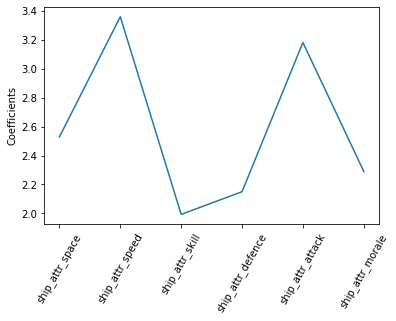

In [16]:
# Check the coefficient for penalization

names = wo_cat_df.drop('ship_sold_price', axis=1).columns
_ = plt.plot(range(len(names)), ridge_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [17]:
# SINGLE PREDICTION
# zztest = np.array([8,8,11,8,5,8])
zztest = np.array([5,13,15,6,11,5])
zztest = zztest.reshape(1, -1)

lasso.predict(zztest)
## actual 34

array([61.35054854])

In [18]:
#sns.histplot(raw_df['ship_sold_price'])

In [19]:
raw_df[['ship_id', 'ship_sold_price']]

,ship_id,ship_sold_price
1,18014,74.42
2,7759,70.70
3,2731,40.93
4,13389,100.47
5,17494,78.29
...,...,...
3743,16100,62.59
3744,28404,23.65
3745,2196,27.79
3746,18131,31.26


In [20]:
raw_df[['ship_id', 'ship_sold_price']].groupby(['ship_id'], as_index=False).agg(['count', 'mean']).sort_values(('ship_sold_price', 'count'), ascending=False)

ship_sold_price            
                  count        mean
ship_id                            
45123                 9   52.193333
14970                 8   48.945000
6714                  7   56.741429
26811                 7   46.785714
11484                 6   52.336667
...                 ...         ...
13118                 1   66.020000
13107                 1  161.580000
13071                 1   54.230000
13040                 1   36.200000
52475                 1   90.620000

[2254 rows x 2 columns]

In [21]:
times_sold = raw_df[['ship_id', 'ship_sold_price']].groupby('ship_id')['ship_sold_price'].apply(list).reset_index(name='ship_sold_price').agg({'ship_sold_price': lambda x: len(x)})

new_df = raw_df[['ship_id', 'ship_sold_price']].groupby('ship_id')['ship_sold_price'].apply(list).reset_index(name='ship_sold_price')
new_df['times_sold'] = times_sold
new_df.sort_values('times_sold', ascending=False, inplace=True)

multiple_sold = new_df[new_df['times_sold'] > 1]

multiple_sold

,ship_id,ship_sold_price,times_sold
2188,45123,"[66.17, 59.1, 63.27, 44.15, 48.1, 34.05, 32.27...",9
1114,14970,"[40.32, 49.12, 52.93, 40.44, 51.37, 40.36, 48....",8
390,6714,"[59.29, 48.19, 50.76, 66.52, 70.42, 46.72, 55.29]",7
1862,26811,"[59.58, 68.77, 53.02, 39.01, 40.84, 33.71, 32.57]",7
774,11484,"[55.32, 62.06, 78.02, 37.6, 39.38, 41.64]",6
...,...,...,...
282,3532,"[35.83, 28.02]",2
2080,33613,"[62.68, 76.44]",2
272,3481,"[68.26, 65.07]",2
633,10030,"[35.99, 35.72]",2


In [22]:
# SAVE MODEL

model_lasso = pickle.dump(lasso, open("db/model_USD.sav", 'wb'))

